In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('./data/Car_Purchasing_Data.csv')

In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [12]:
# 나이대는 20살부터 70살까지
# 연봉은 20000 달러부터 100000 달러까지

# 나이가 가장 어린사람의 데이터
df[df['Age'] == df['Age'].min()]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),1,20.0,70467.29492,100.0,494606.6334,28645.39425


In [17]:
df.loc[df['Annual Salary'] == df['Annual Salary'].max(), ['Customer Name', 'Car Purchase Amount', 'Age']]

,Customer Name,Car Purchase Amount,Age
28,Gemma Hendrix,58350.31809,46.124036


In [19]:
df.corr(numeric_only=True)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


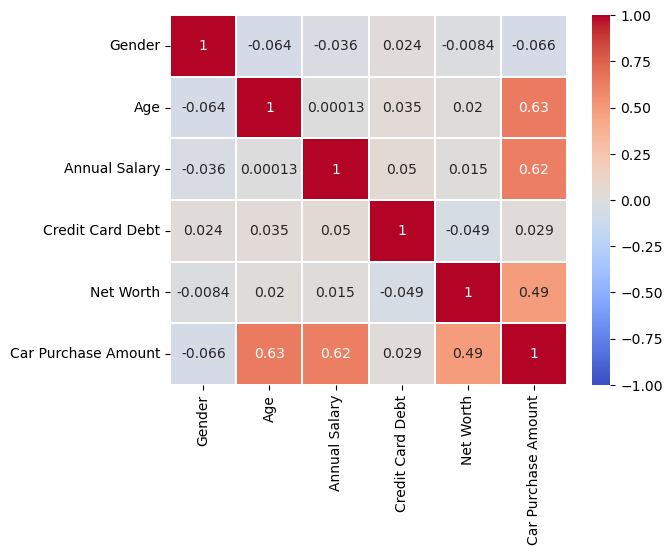

In [24]:
sb.heatmap(data = df.corr(numeric_only=True), annot=True, 
           cmap='coolwarm', vmin = -1, vmax = 1, linewidths= 0.2)
plt.show()

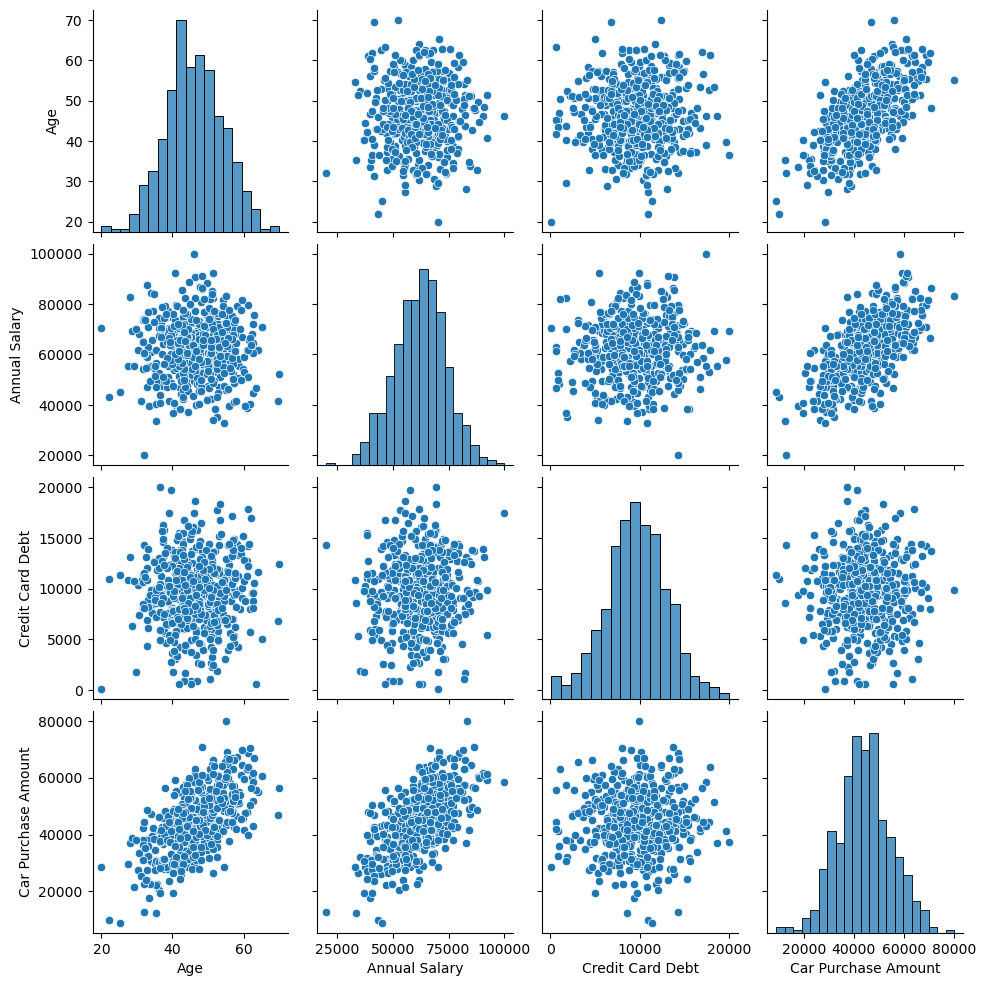

In [27]:
sb.pairplot(data = df, vars = ['Age', 'Annual Salary', 'Credit Card Debt', 'Car Purchase Amount']) 
plt.show()

In [29]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [32]:
y = df['Car Purchase Amount']
X = df.loc[:, 'Gender' : 'Net Worth'] 

In [31]:
df['Country'].value_counts()

Country
Mauritania                                      6
Israel                                          6
Bolivia                                         6
Kyrgyzstan                                      5
Samoa                                           5
                                               ..
Ukraine                                         1
New Zealand                                     1
Saint Helena, Ascension and Tristan da Cunha    1
Malaysia                                        1
marlal                                          1
Name: count, Length: 211, dtype: int64

In [33]:
# 1. 리니어 리그레션, 랜덤 포레스트 리그레션, XGboost 리그레션
# 2. 딥러닝 ANN

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [38]:
regressor = LinearRegression()

In [39]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred = regressor.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
r2_score(y_test, y_pred)

0.9999999667332884

In [43]:
mean_absolute_error(y_test, y_pred)

1.3350627824508774

In [44]:
mean_squared_error(y_test, y_pred)

2.7933992939706864

In [46]:
regressor2 = RandomForestRegressor()

In [48]:
regressor2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
y_pred2 = regressor2.predict(X_test)

In [51]:
mean_squared_error(y_test, y_pred2)

5864909.734926726

In [52]:
r2_score(y_test, y_pred2)

0.9301545391897682

In [54]:
regressor3 = XGBRegressor()

In [55]:
regressor3.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [57]:
y_pred3 = regressor3.predict(X_test)

In [58]:
print(mean_squared_error(y_test, y_pred3))
print(r2_score(y_test, y_pred3))

5160166.040505806
0.9385473619806801


In [59]:
# 가장 성능이 뛰어난 regressor를 파일로 저장한다.
import joblib

In [60]:
joblib.dump(regressor, './model/regressor.pkl')

['./model/regressor.pkl']